# 4.10: Coding Etiquette (Part 1)

# Table Of Contents:
# Importing Libraries 
# Importing Dataframes
# Handling Pii
# Create regional segmentation of data
# Create an exclusion flag for low-activity customers
# Generate Customer profiling Variables
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure¶
# Region and Department based comparison between customer profiles
# Determine whether there’s a difference in spending habits between the different U.S. regions
# Visualizations

# 01 Importing Libraries

In [191]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Dataframes

In [193]:
#creating path
path=r'/Users/serenakunzmann/Documents/CareerFoundry-Python/03-2025 Instacart Basket Analysis'

In [195]:
#importing ords_prods_cust_combined dataframe
ords_prods_cust=pd.read_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','ords_prods_cust_merged.pkl'))

In [196]:
#importing ords_prods_cust filtered dataframe
df_filtered_=pd.read_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','ords_prods_cust_active.pkl'))

In [197]:
# Importing Dataframe
Df_Department= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Data Consistency','departments_wrangledd.csv'))

In [198]:
# Merge the Df_Department and Updated_df to analyze the departments against age groups, income levels and products
Df_Merged = df_filtered_.merge(Df_Department, on = 'department_id')

In [220]:
# Export the new dataframe (Df_Merged) where we have data from orders, customers, products and departments
Df_Merged.to_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','orders_products_customers_departments.pkl'))

# 03 Handling Pii

In [ ]:
#dropping first_name
ords_prods_cust=ords_prods_cust.drop(columns = ['first_name'])

In [ ]:
#dropping true column
ords_prods_cust=ords_prods_cust.drop(columns=['true'])

# 04 Create regional segmentation of data

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

In [199]:
#creating for loop command on state to create region column
result=[]
for value in ords_prods_cust ["state"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        result.append ("Midwest")
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        result.append ("South")
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        result.append ("West")

In [200]:
#creating new column
ords_prods_cust['region']=result

In [424]:
#checking if new column was succesful
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,dependents_count,fam_status,income,region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N


# Create an exclusion flag for low-activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [201]:
#creating an activity flag with max_order
result_2 =[]
for value in ords_prods_cust['max_order']:
    if value <=5:
        result_2.append ("Y")
    else:
        result_2.append ("N")

In [202]:
#creating a column for low_activity
ords_prods_cust['low_activity']=result_2

In [428]:
#checking to see low_activity column was successfully added
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,dependents_count,fam_status,income,region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N


In [204]:
#creating new dataframe excluding the customers with low_activity = Y
df_filtered_= ords_prods_cust[ords_prods_cust['low_activity']=='N']

In [30]:
#exporting data subset
df_filtered_.to_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','ords_prods_cust_active.pkl'))

In [26]:
df_filtered_.shape

(30171424, 36)

# Generate Customer profiling Variables

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day”

In [205]:
#creating customer profile on age
df_filtered_.loc[df_filtered['age'] < 25, 'age_group'] = 'Gen Z'

/var/folders/dc/m090wqld5fs_bfy3ppvjgp380000gn/T/ipykernel_7018/3800222066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_.loc[df_filtered['age'] < 25, 'age_group'] = 'Gen Z'


In [206]:
df_filtered_.loc[(df_filtered['age'] >= 25) & (df_filtered['age'] < 40), 'age_group'] = 'Millennial'

In [207]:
df_filtered_.loc[(df_filtered['age'] >= 40) & (df_filtered['age'] < 60), 'age_group'] = 'Gen X'

In [208]:
df_filtered_.loc[df_filtered['age'] >= 60, 'age_group'] = 'Boomer'

In [209]:
#creating AgeGroup subset 
AgeGroup = df_filtered_['age_group'].value_counts(dropna = False)

In [572]:
AgeGroup

age_group
Boomer        10305785
Gen X          9473118
Millennial     7065318
Gen Z          3327203
Name: count, dtype: int64

In [44]:
#creating customer profile on income
df_filtered_.loc[df_filtered['income'] < 40000, 'income_bracket'] = 'Low'

In [46]:
df_filtered_.loc[(df_filtered['income'] >= 40000) & (df_filtered['income'] < 80000), 'income_bracket'] = 'Middle'

In [48]:
df_filtered_.loc[df_filtered['income'] >= 80000, 'income_bracket'] = 'High'

In [50]:
#creating Income subset 
IncomeBracket = df_filtered_['income_bracket'].value_counts(dropna = False)

In [48]:
IncomeBracket

income_bracket
High      19487612
Middle     9128075
Low        1555737
Name: count, dtype: int64

In [52]:
#creatingn customer profile on dependants_count
df_filtered_.loc[df_filtered['dependents_count'] == 0, 'family_type'] = 'No kids'

In [53]:
df_filtered_.loc[(df_filtered['dependents_count'] > 0) & (df_filtered['dependents_count'] <= 2), 'family_type'] = 'Small family'

In [56]:
df_filtered_.loc[df_filtered['dependents_count'] > 2, 'family_type'] = 'Large family'

In [58]:
#creating family_type subset
FamilyType = df_filtered_['family_type'].value_counts(dropna = False)

In [54]:
FamilyType

family_type
Small family    15055397
Large family     7576814
No kids          7539213
Name: count, dtype: int64

In [60]:
#creating customer profile for weekday vs weekend shoppers
df_filtered_.loc[df_filtered_['order_day_of_week'].isin([0, 6]), 'shop_day'] = 'Weekend'

In [61]:
df_filtered_.loc[~df_filtered_['order_day_of_week'].isin([0, 6]), 'shop_day'] = 'Weekday'

In [64]:
#creating customer profile on Time of day shopping
df_filtered_.loc[df_filtered_['order_hour_of_day'] < 11, 'shop_time'] = 'Morning'

In [66]:
df_filtered_.loc[(df_filtered_['order_hour_of_day'] >= 11) & (df_filtered_['order_hour_of_day'] < 17), 'shop_time'] = 'Afternoon'

In [68]:
df_filtered_.loc[df_filtered_['order_hour_of_day'] >= 17, 'shop_time'] = 'Evening'

In [510]:
#checking if new columns were added correctly
df_filtered_.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,dependents_count,fam_status,income,region,low_activity,age_group,income_bracket,family_type,shop_day,shop_time
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,N,Millennial,Middle,Large family,Weekday,Morning
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,N,Millennial,Middle,Large family,Weekday,Morning
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,3,married,40423,South,N,Millennial,Middle,Large family,Weekday,Morning
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,N,Millennial,Middle,Large family,Weekday,Morning
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,N,Millennial,Middle,Large family,Weekday,Morning


In [70]:
df_filtered_.to_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','ords_prods_cust_active_profiles.pkl'))

In [71]:
df_filtered_.loc[:, 'Customer_profile'] = df_filtered_['age_group'] + ' ' + df_filtered_['family_type']

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure¶

In [72]:
#creating summary stats for customer frequency on age group
df_filtered_.groupby('age_group').agg({'days_since_prior_order': ['mean','max','min']})

days_since_prior_order           
                             mean   max  min
age_group                                   
Boomer                  10.626637  30.0  0.0
Gen X                   10.641350  30.0  0.0
Gen Z                   10.588644  30.0  0.0
Millennial              10.654507  30.0  0.0

In [73]:
#creating summary stats for expenditure on age groups
df_filtered_.groupby('age_group').agg({'prices': ['mean','max','min']})

prices           
                mean   max  min
age_group                      
Boomer      7.794816  25.0  1.0
Gen X       7.791347  25.0  1.0
Gen Z       7.789419  25.0  1.0
Millennial  7.780957  25.0  1.0

# Region and Department based comparison between customer profiles

In [91]:
# Using crosstab functiion on Region and Department
Cross_RegionDepartment = pd.crosstab(Df_Merged['region'], Df_Merged['department'], dropna = False)


In [548]:
Cross_RegionDepartment

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,32883,94027,255082,583228,151846,7806,230173,1182974,228200,187653,...,161733,58854,153688,15056,7737,408085,97357,20748,2080206,629156
Northeast,24114,71370,194076,451674,114701,5482,171517,892624,173837,139489,...,120839,43342,115204,11104,6060,303892,72593,17242,1554985,481100
South,47069,136961,362204,837788,217548,10953,327746,1682429,325082,264766,...,222964,82329,217724,21024,11273,575074,138415,28893,2955891,894880
West,35507,100708,281126,634551,169324,8600,252605,1295413,250931,205775,...,172759,64197,169113,15357,8345,445063,103442,23456,2268862,694215


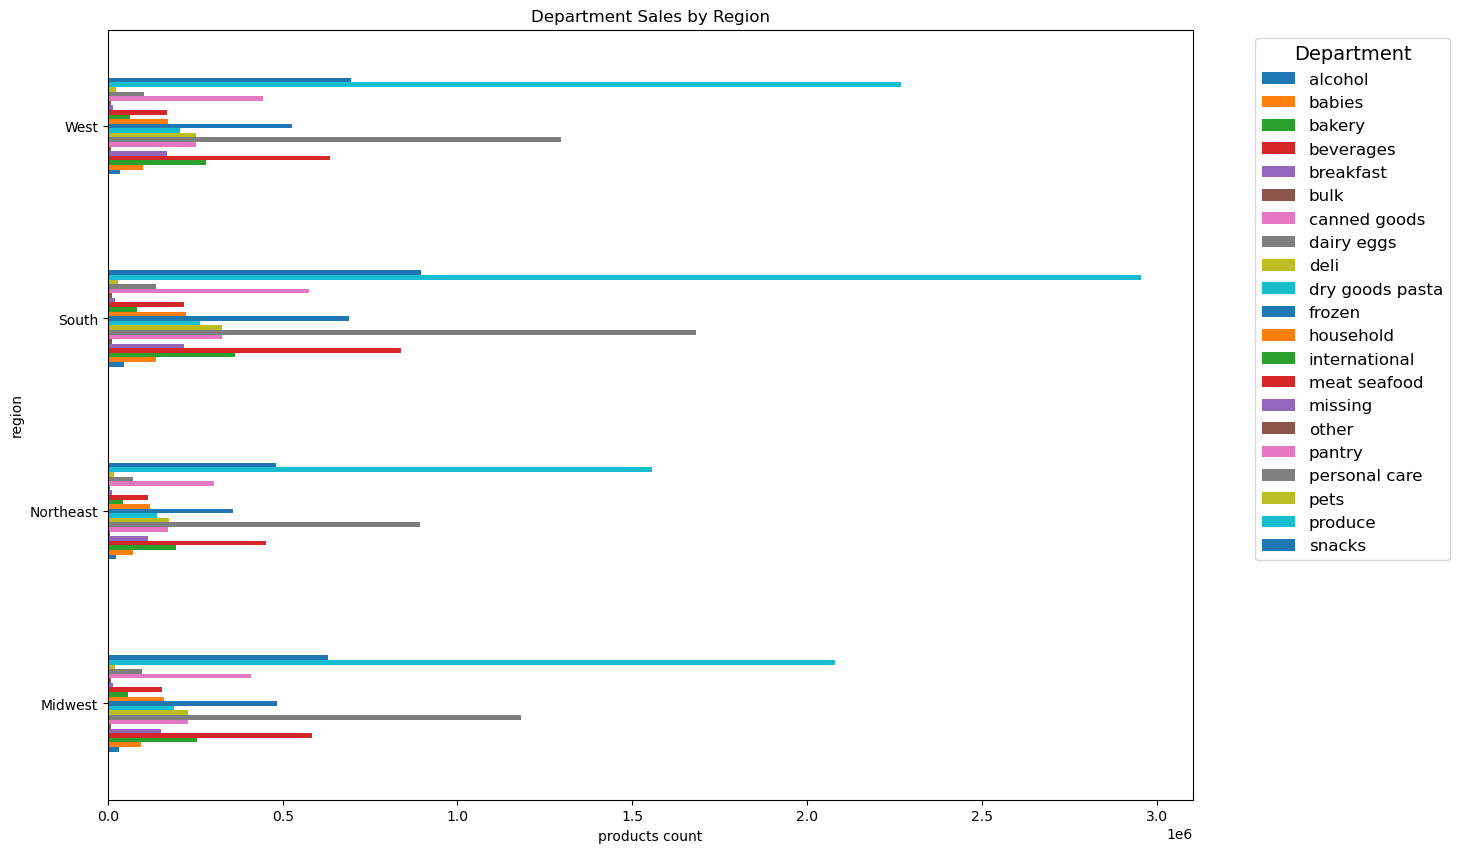

In [92]:
# Visualize a bar chart of Products ordered by Department across different regions
BarChart_RegionDepartment = Cross_RegionDepartment.plot(  kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')


# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [172]:
# Using crosstab functiion on Region and income bracket
Cross_RegionIncome = pd.crosstab(Df_Merged['region'], Df_Merged['income_bracket'], dropna = False)

In [174]:
Cross_RegionIncome

income_bracket,High,Low,Middle
region,,,
Midwest,4597214,360797,2112111
Northeast,3473353,272252,1578746
South,6451603,533978,3064578
West,4965442,388710,2372640


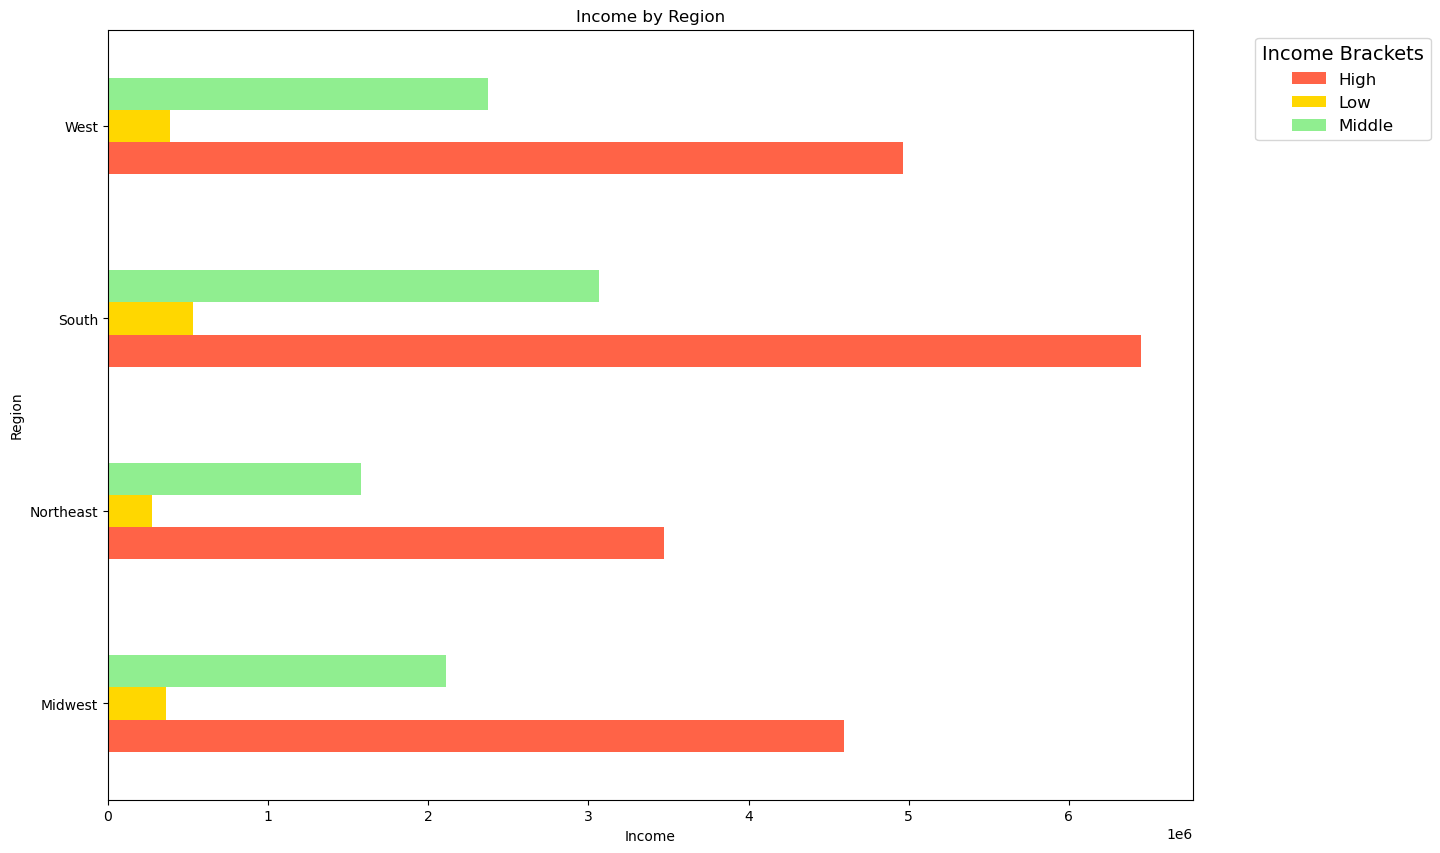

In [186]:
# Visualize a bar chart of income brackets across different regions
BarChart_RegionIncome = Cross_RegionIncome.plot(  color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6'],kind = 'barh', figsize=(14,10))
plt.title('Income by Region')
plt.xlabel('Income')
plt.ylabel('Region')


# Move legend outside of plot
plt.legend(title='Income Brackets', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [188]:
#exporting barchart
BarChart_RegionIncome.figure.savefig(os.path.join(path,'Analysis','Visualizations','BarChart_RegionIncome.png'))

# Determine whether there’s a difference in spending habits between the different U.S. regions

In [93]:
#crossing spending_flag with region to see if there is a difference in spending habits
crosstab = pd.crosstab(ords_prods_cust['spending_flag'], ords_prods_cust['region'], dropna = False)

In [444]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,24.446783,15.572764,33.898036,26.082417
Low spender,23.441304,17.667857,33.301087,25.589753


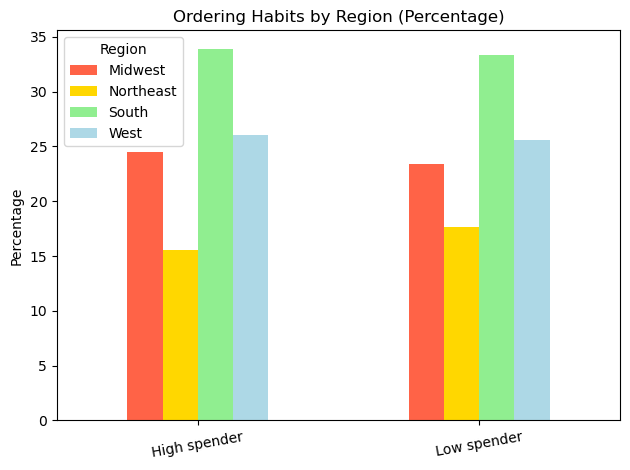

In [94]:
#visualizing a bar chart for crosstab between
# Normalize crosstab by row to get percentages
crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
# Plot the percentages
BarChart_ords_region = crosstab.sort_index().plot.bar(
    color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6']
)
plt.title('Ordering Habits by Region (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=10)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [120]:
#crossing region with brand loyalty to see if there are any differences in order habits
crosstab_Reg_loy = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['loyalty_flag'], dropna = False)

In [121]:
crosstab_Reg_loy

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


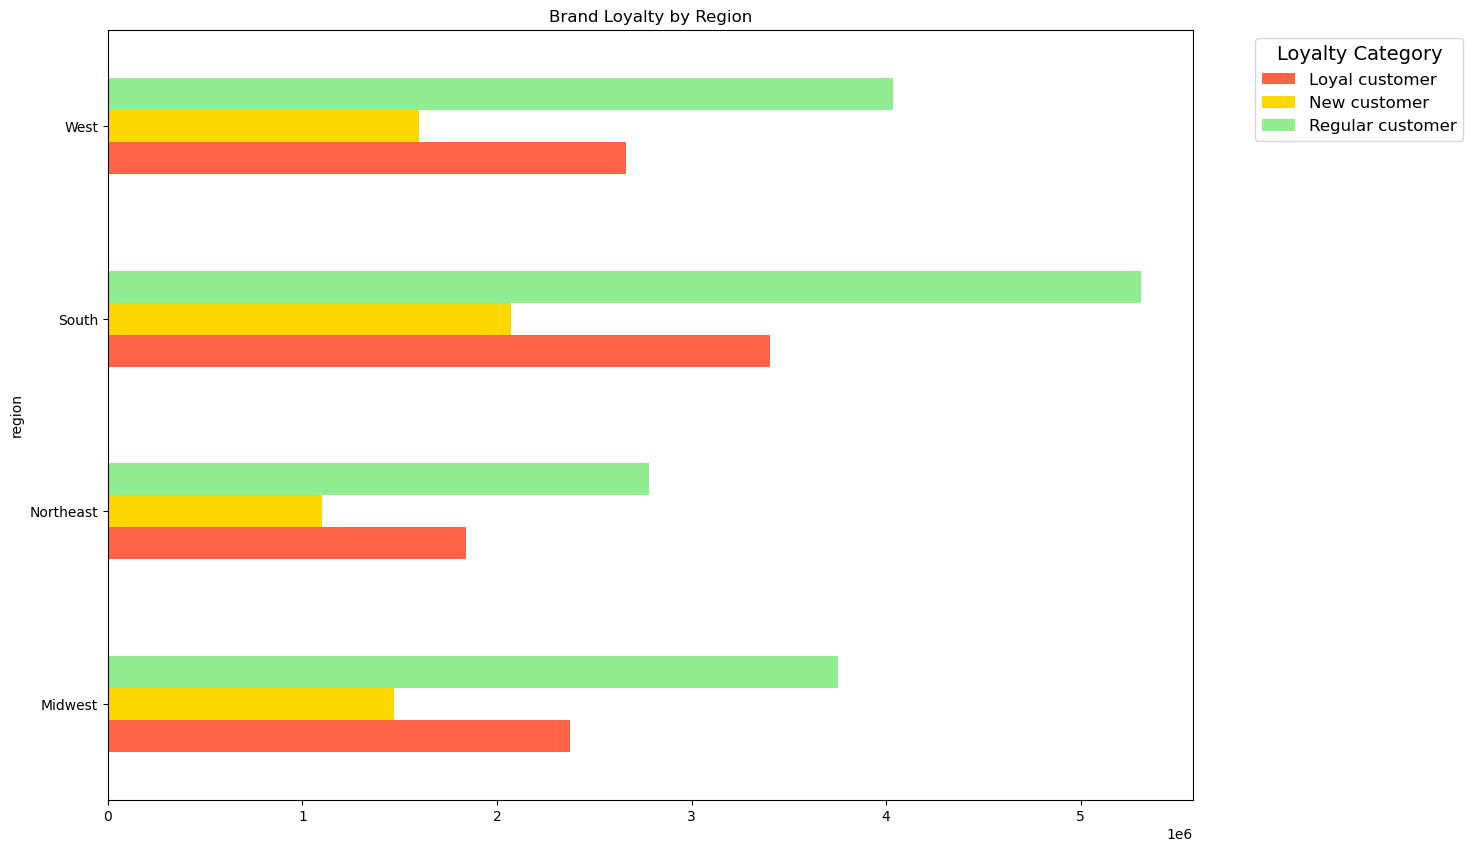

In [130]:
# Visualize a bar chart 
BarChart_RegionLoyalty = crosstab_Reg_loy.plot( color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6'], kind = 'barh', figsize=(14,10))
plt.title('Brand Loyalty by Region')
plt.xlabel('')
plt.ylabel('region')


# Move legend outside of plot
plt.legend(title='Loyalty Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [128]:
#exporting barchart
BarChart_RegionLoyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','BarChart_RegionLoyalty.png'))

# Visualizations

In [ ]:
# Using crosstab functiion on Region and Department
Cross_AgeDepartment = pd.crosstab(Df_Merged['age_group'], Df_Merged['department'], dropna = False)

In [158]:
#using crosstab function on customer profile and spending flag
Crosstab_CP_of = pd.crosstab(df_filtered_['Customer_profile'],df_filtered_['spending_flag'], dropna=False)

NameError: name 'barchart_pricerange' is not defined

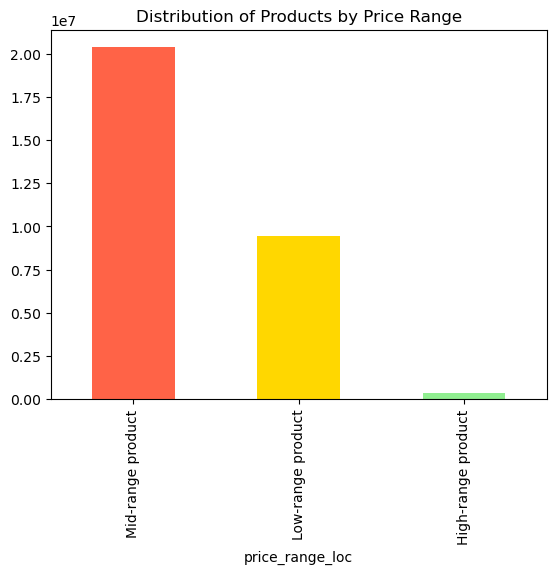

In [168]:
#creating visualization for simplier price range buckets
bar_pricerange= df_filtered_['price_range_loc'].value_counts().plot.bar(
    color=['#FF6347','#FFD700','#90EE90','#ADD8E6'])
#creating labels and titles
plt.title('Distribution of Products by Price Range')
plt.xticks(ticks=range(len(barchart_pricerange.patches)), 
           labels=['High-range: > $15','Mid-range: $6-15', 'Low-range: <= $5'])
plt.ylabel('')  # Hide the y-label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

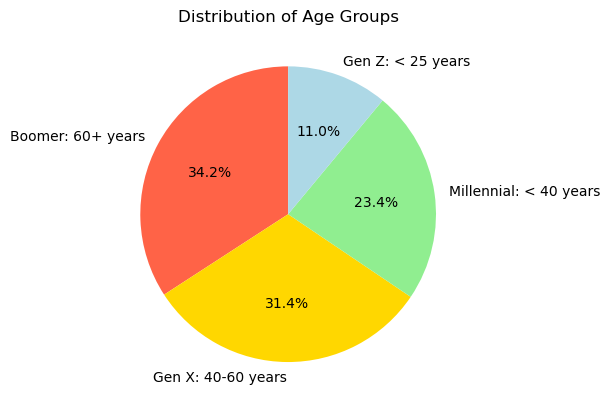

In [135]:
# Visualize a pie chart for age group
PieChart_AgeGroup = AgeGroup.plot.pie(autopct='%1.1f%%', labels= ['Boomer: 60+ years','Gen X: 40-60 years','Millennial: < 40 years', 'Gen Z: < 25 years'], startangle=90, colors=['#FF6347','#FFD700','#90EE90','#ADD8E6'])
plt.title('Distribution of Age Groups')
# Hide the y-label
plt.ylabel('')
plt.show()

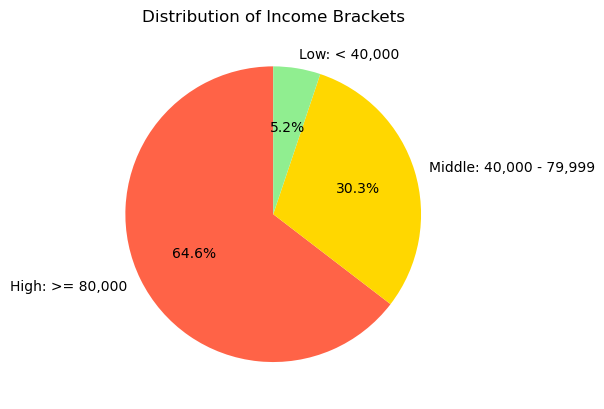

In [137]:
# Visualize a pie chart for income
PieChart_IncomeBracket = IncomeBracket.plot.pie(autopct='%1.1f%%', labels= ['High: >= 80,000','Middle: 40,000 - 79,999', 'Low: < 40,000'], startangle=90, colors=['#FF6347','#FFD700','#90EE90','#ADD8E6'])
plt.title('Distribution of Income Brackets')
# Hide the y-label
plt.ylabel('')
plt.show()

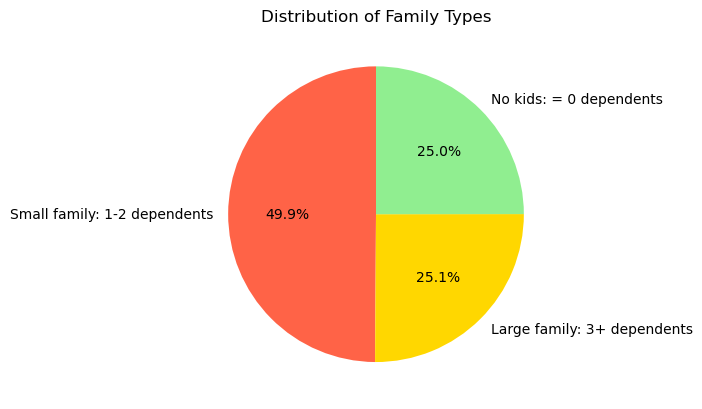

In [139]:
# Visualize a pie chart for family types
PieChart_Family_type = FamilyType.plot.pie(autopct='%1.1f%%', labels= ['Small family: 1-2 dependents','Large family: 3+ dependents','No kids: = 0 dependents'], startangle=90, colors=['#FF6347','#FFD700','#90EE90','#ADD8E6'])
plt.title('Distribution of Family Types')
# Hide the y-label
plt.ylabel('')
plt.show()

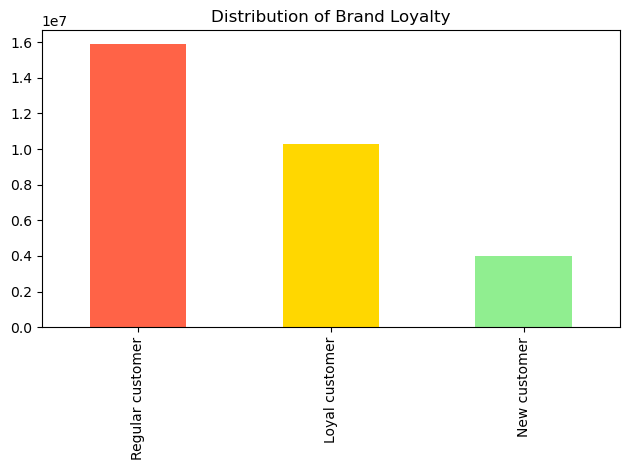

In [170]:
# creating visual for distribution of brand loyalty 
bar_loyalty_flag=df_filtered['loyalty_flag'].value_counts().plot.bar(color=['#FF6347','#FFD700','#90EE90'])
#creating labels and titles
plt.title('Distribution of Brand Loyalty')
plt.ylabel('')  # Hide the y-label
plt.xlabel('')  # Hide the x-label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [96]:
#using crosstab function on loyalty and order freq
Crosstab_loyalty_order_freq = pd.crosstab(df_filtered['loyalty_flag'],df_filtered['order_frequency_flag'], dropna=False)

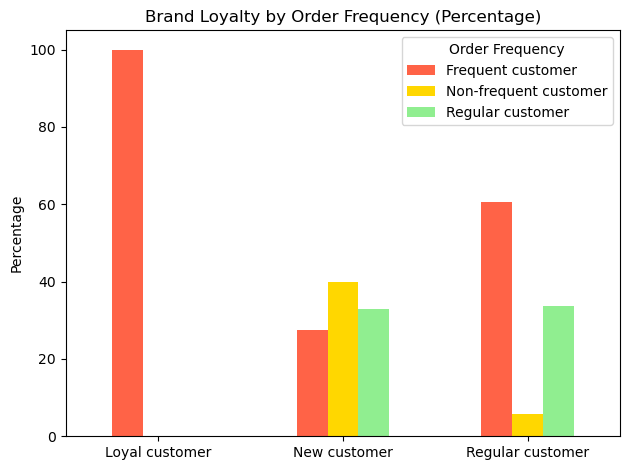

In [145]:
#visualizing a bar chart for crosstab between loyalty flag and order frequency
# Normalize crosstab by row to get percentages
Crosstab_loyalty_order_freq = Crosstab_loyalty_order_freq.div(Crosstab_loyalty_order_freq.sum(axis=1), axis=0) * 100
# Plot the percentages
BarChart_loyalty_order_freq = Crosstab_loyalty_order_freq.sort_index().plot.bar(
    color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6']
)
plt.title('Brand Loyalty by Order Frequency (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Order Frequency')
plt.tight_layout()
plt.show()

In [154]:
#using crosstab function on family_status and age group
Crosstab_Family_stat_loyalty = pd.crosstab(df_filtered['fam_status'],df_filtered['loyalty_flag'], dropna=False)

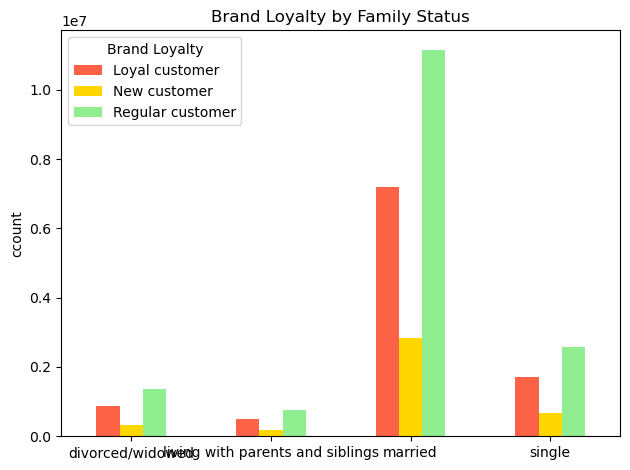

In [155]:
#visualizing a bar chart for crosstab between loyalty and family status

# Plot the percentages
BarChart_Family_stat_loyalty = Crosstab_Family_stat_loyalty.sort_index().plot.bar(
    color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6']
)
plt.title('Brand Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('ccount')
plt.xticks(rotation=0)
plt.legend(title='Brand Loyalty')
plt.tight_layout()
plt.show()

In [160]:
#using crosstab function on loyalty flag and spending flag
Crosstab_loyalty_spend = pd.crosstab(df_filtered['loyalty_flag'],df_filtered['spending_flag'], dropna=False)

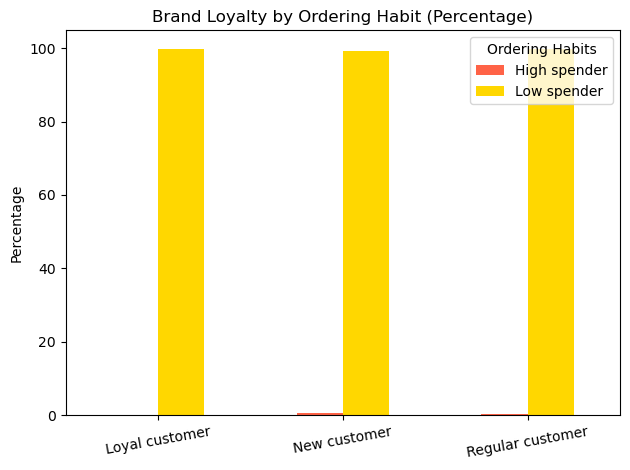

In [162]:
#visualizing a bar chart for crosstab between brand loyalty and ordering habits
# Normalize crosstab by row to get percentages
Crosstab_loyalty_spend = Crosstab_loyalty_spend.div(Crosstab_loyalty_spend.sum(axis=1), axis=0) * 100
# Plot the percentages
BarChart_loyalty_spend = Crosstab_loyalty_spend.sort_index().plot.bar(
    color=['#FF6347', '#FFD700', '#90EE90', '#ADD8E6']
)
plt.title('Brand Loyalty by Ordering Habit (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=10)
plt.legend(title='Ordering Habits')
plt.tight_layout()
plt.show()